In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = training_data.iloc[:, 1:2].values

In [7]:
training_set[0:5]

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       [ 328.34],
       [ 322.04]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled[0:5]

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       [ 0.07984225]])

In [11]:
X_train = []
y_train = []

In [12]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [14]:
X_train[0]

array([ 0.08581368,  0.09701243,  0.09433366,  0.09156187,  0.07984225,
        0.0643277 ,  0.0585423 ,  0.06568569,  0.06109085,  0.06639259,
        0.0614257 ,  0.07474514,  0.02797827,  0.02379269,  0.02409033,
        0.0159238 ,  0.01078949,  0.00967334,  0.01642607,  0.02100231,
        0.02280676,  0.02273235,  0.02810849,  0.03212665,  0.0433812 ,
        0.04475779,  0.04790163,  0.0440695 ,  0.04648783,  0.04745517,
        0.04873875,  0.03936305,  0.04137213,  0.04034898,  0.04784582,
        0.04325099,  0.04356723,  0.04286033,  0.04602277,  0.05398467,
        0.05738894,  0.05714711,  0.05569611,  0.04421832,  0.04514845,
        0.04605997,  0.04412531,  0.03675869,  0.04486941,  0.05065481,
        0.05214302,  0.05612397,  0.05818885,  0.06540665,  0.06882953,
        0.07243843,  0.07993526,  0.07846566,  0.08034452,  0.08497656])

In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape

(1198, 60)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
X_train.shape

(1198, 60, 1)

In [23]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras; import keras.backend
if keras.backend.backend() != 'tensorflow':
    raise BaseException("This script uses other backend")
else:
    keras.backend.set_image_dim_ordering('th')
    print("Backend ok")

Using TensorFlow backend.


Backend ok


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
regressor = Sequential()

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [29]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(Dense(units = 1))

In [31]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0552
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - lo

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015


In [33]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:, 1:2].values

In [34]:
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [35]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [36]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [37]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

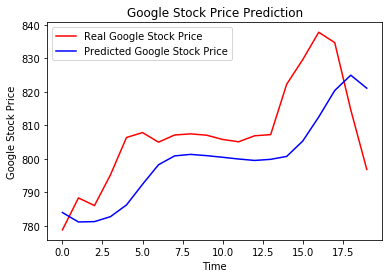

In [38]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()